# Basic HMS Workflow: Initialize, Execute, and Extract Results

This notebook demonstrates the fundamental hms-commander workflow:

1. **Initialize** an HMS project with `init_hms_project()`
2. **Execute** a simulation run with `HmsCmdr.compute_run()`
3. **Extract** results with `HmsResults`

This is the recommended starting point for new users.

**Estimated Time**: 10-15 minutes (including ~30-60 seconds for HMS execution)

In [1]:
# pip install hms-commander

**For Development**: If working on hms-commander source code, use the `hmscmdr_local` conda environment (editable install) instead of pip install.

In [2]:
from pathlib import Path
from hms_commander import (
    HmsExamples,
    init_hms_project,
    HmsCmdr,
    HmsResults,
    HmsDss
)

print("hms-commander loaded successfully")

hms-commander loaded successfully


## 1. Extract Example Project

We use `HmsExamples.extract_project()` to get a real HMS project from your HMS installation. This ensures reproducibility across all users.

In [3]:
# Extract the 'tifton' example project
# This comes bundled with HEC-HMS installations
project_path = HmsExamples.extract_project(
    "tifton",
    output_path=Path.cwd() / "hms_example_projects" / "tifton_basic_workflow"
)

print(f"Project extracted to: {project_path}")

2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.10 at C:\Program Files\HEC\HEC-HMS\4.10


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.11 at C:\Program Files\HEC\HEC-HMS\4.11


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.12 at C:\Program Files\HEC\HEC-HMS\4.12


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.13 at C:\Program Files\HEC\HEC-HMS\4.13


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.4.1 at C:\Program Files\HEC\HEC-HMS\4.4.1


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.5 at C:\Program Files\HEC\HEC-HMS\4.5


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.6 at C:\Program Files\HEC\HEC-HMS\4.6


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.7.1 at C:\Program Files\HEC\HEC-HMS\4.7.1


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.8 at C:\Program Files\HEC\HEC-HMS\4.8


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.9 at C:\Program Files\HEC\HEC-HMS\4.9


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 3.0.0 at C:\Program Files (x86)\HEC\HEC-HMS\3.0.0


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 3.0.1 at C:\Program Files (x86)\HEC\HEC-HMS\3.0.1


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 3.1.0 at C:\Program Files (x86)\HEC\HEC-HMS\3.1.0


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 3.2 at C:\Program Files (x86)\HEC\HEC-HMS\3.2


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 3.3 at C:\Program Files (x86)\HEC\HEC-HMS\3.3


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 3.4 at C:\Program Files (x86)\HEC\HEC-HMS\3.4


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 3.5 at C:\Program Files (x86)\HEC\HEC-HMS\3.5


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.0 at C:\Program Files (x86)\HEC\HEC-HMS\4.0


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.1 at C:\Program Files (x86)\HEC\HEC-HMS\4.1


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.2.1 at C:\Program Files (x86)\HEC\HEC-HMS\4.2.1


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found HMS 4.3 at C:\Program Files (x86)\HEC\HEC-HMS\4.3


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Found 21 HMS installation(s) with examples


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Catalog built: 68 project entries


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Using latest installed version: 4.13


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Removing existing project folder: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Extracting 'tifton' from HMS 4.13


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Source: C:\Program Files\HEC\HEC-HMS\4.13\samples.zip


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Destination: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton


2026-01-08 13:12:54 - hms_commander.HmsExamples - INFO - Successfully extracted 'tifton' to C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton


Project extracted to: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton


## 2. Initialize Project

The `init_hms_project()` function:
- Parses all HMS files (.hms, .basin, .met, .control, .run, .gage)
- Builds DataFrames for easy data access
- Returns an `HmsPrj` object with project metadata

In [4]:
# Initialize the project
hms = init_hms_project(project_path)

# Display project summary
print(f"Project: {hms.project_name}")
print(f"HMS Version: {hms.hms_version}")
print(f"Basin Models: {len(hms.basin_df)}")
print(f"Met Models: {len(hms.met_df)}")
print(f"Control Specs: {len(hms.control_df)}")
print(f"Simulation Runs: {len(hms.run_df)}")

2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO - HMS project initialized: tifton


2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO -   Version: 4.13


2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO -   Basin models: 1


2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO -   Met models: 1


2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO -   Control specs: 1


2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO -   Simulation runs: 1


2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO -   Gages: 2


2026-01-08 13:12:54 - hms_commander.HmsPrj - INFO -   Paired data tables: 0


Project: tifton
HMS Version: 4.13
Basin Models: 1
Met Models: 1
Control Specs: 1
Simulation Runs: 1


In [5]:
# View the run configurations
print("Available Simulation Runs:")
print("=" * 60)
hms.run_df[['name', 'basin_model', 'met_model', 'control_spec', 'dss_file']]

Available Simulation Runs:


,name,basin_model,met_model,control_spec,dss_file
0,1970 simulation,Tifton,Tifton Hyetograph,Jan1-Jun30 1970,1970_simulation.dss


## 3. Select a Run

Choose which simulation run to execute. The `run_df` shows all available runs with their configurations.

In [6]:
# Select the first available run
run_name = hms.run_df['name'].iloc[0]
print(f"Selected run: '{run_name}'")

# Get the run configuration details
run_config = hms.get_run_configuration(run_name)
print("\nRun Configuration:")
for key, value in run_config.items():
    print(f"  {key}: {value}")

Selected run: '1970 simulation'

Run Configuration:
  run_name: 1970 simulation
  basin_name: Tifton
  met_name: Tifton Hyetograph
  control_name: Jan1-Jun30 1970
  dss_file: 1970_simulation.dss
  basin_area: 19.27
  basin_num_subbasins: 1
  basin_file: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton\Tifton.basin
  met_precip_method: Specified Average
  met_file: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton\Tifton_Hyetograph.met
  control_start: 1970-01-01 01:00:00
  control_end: 1970-06-30 01:00:00
  control_interval_minutes: 60
  control_duration_hours: 4320.0
  control_file: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton\Jan1_Jun30_1970.control


## 4. Execute the Simulation

`HmsCmdr.compute_run()` executes the HMS simulation:
- Generates a Jython script
- Launches HEC-HMS in headless mode
- Writes results to DSS file
- Returns `True` if successful, `False` otherwise

**Execution Time**: Typically 30-60 seconds for small projects like tifton.

**Note**: Requires HEC-HMS 4.x installed on your system.

In [7]:
# Execute the simulation run
print(f"Executing run: '{run_name}'...")
print("=" * 50)

success = HmsCmdr.compute_run(run_name, hms_object=hms)

if success:
    print(f"\nRun completed successfully!")
else:
    print(f"\nRun failed or completed with warnings.")
    print("Check console output above for details.")

2026-01-08 13:12:54 - hms_commander.HmsJython - INFO - Found HEC-HMS: C:\Program Files\HEC\HEC-HMS\4.10


2026-01-08 13:12:54 - hms_commander.HmsCmdr - INFO - Computing run '1970 simulation' in C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton


2026-01-08 13:12:54 - hms_commander.HmsJython - INFO - Executing HMS 4.10 via direct Java invocation


2026-01-08 13:12:54 - hms_commander.HmsJython - INFO - Script: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton\hms_script.py


2026-01-08 13:12:54 - hms_commander.HmsJython - INFO - Memory: -Xms128M -Xmx4G


Executing run: '1970 simulation'...


2026-01-08 13:12:57 - hms_commander.HmsJython - INFO - HMS 4.10 script executed successfully


2026-01-08 13:12:57 - hms_commander.HmsCmdr - INFO - Run '1970 simulation' completed successfully



Run completed successfully!


## 5. Locate Results DSS File

After execution, results are written to a DSS file. The location is specified in the run configuration.

In [8]:
# Get the DSS result file path
dss_file = hms.get_run_dss_file(run_name)

# Validate DSS file configuration and existence
assert dss_file is not None, "Run does not have DSS output file configured"
assert dss_file.exists(), f"DSS file not found: {dss_file}"

print(f"DSS File: {dss_file}")
print(f"File exists: {dss_file.exists()}")

DSS File: C:\GH\hms-commander\examples\hms_example_projects\tifton_basic_workflow\tifton\1970_simulation.dss
File exists: True


## 6. Extract Peak Flows

`HmsResults.get_peak_flows()` extracts peak discharge values for all elements in the DSS file.

In [9]:
# Check if DSS operations are available
if HmsDss.is_available() and dss_file and dss_file.exists():
    # Extract peak flows
    peaks = HmsResults.get_peak_flows(dss_file)
    
    # Validate: peaks DataFrame should not be empty
    assert not peaks.empty, "No peak flows found in DSS file"
    
    print("Peak Flows:")
    print("=" * 60)
    display(peaks)
    
    # Validate: peaks should be positive
    assert (peaks['peak_flow'] > 0).all(), "All peak flows should be positive"
    print("\n[OK] All peak flows are positive")
else:
    print("DSS operations not available or results file not found.")
    print("Install pyjnius and ensure Java is available for DSS support.")

2026-01-08 13:12:57 - hms_commander.dss.core - INFO - Configured JVM with max memory: 4G


Configuring Java VM for DSS operations...
  Found Java: C:\Program Files\Java\jre1.8.0_471
[OK] Java VM configured


2026-01-08 13:12:58 - hms_commander.dss.hms_dss - INFO - Extracting peaks from 12 paths...


2026-01-08 13:12:58 - hms_commander.dss.hms_dss - INFO - Batch 1/1: processing 12 paths...


2026-01-08 13:12:58 - hms_commander.dss.hms_dss - INFO - Extracted peak flows for 12 elements


Peak Flows:


,element,peak_flow,peak_time,units,dss_path
0,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01JAN1970/1HOUR/RUN:1970 SIMULATION/
1,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01FEB1970/1HOUR/RUN:1970 SIMULATION/
2,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01MAR1970/1HOUR/RUN:1970 SIMULATION/
3,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01APR1970/1HOUR/RUN:1970 SIMULATION/
4,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01MAY1970/1HOUR/RUN:1970 SIMULATION/
5,74006,927.843616,1970-03-31 12:00:00,CFS,//74006/FLOW/01JUN1970/1HOUR/RUN:1970 SIMULATION/
6,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01JAN1970/1HOUR/RUN:1970 SIMU...
7,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01FEB1970/1HOUR/RUN:1970 SIMU...
8,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01MAR1970/1HOUR/RUN:1970 SIMU...
9,STATION I,927.843616,1970-03-31 12:00:00,CFS,//STATION I/FLOW/01APR1970/1HOUR/RUN:1970 SIMU...



[OK] All peak flows are positive


## 7. Extract Hydrograph Time Series

`HmsResults.get_outflow_timeseries()` extracts the full hydrograph for a specific element.

### DSS Pathname Structure

HEC-DSS files use a 6-part pathname format:

```
/A-part/B-part/C-part/D-part/E-part/F-part/
```

| Part | Description | Example |
|------|-------------|---------|
| A | Basin/Project name | `TIFTON` |
| B | Location/Element name | `OUTLET` |
| C | Parameter type | `FLOW`, `PRECIP`, `STORAGE` |
| D | Time window start | `01JAN2000` |
| E | Time interval | `15MIN`, `1HOUR` |
| F | Run name/version | `RUN:RUN 1` |

In [10]:
if HmsDss.is_available() and dss_file and dss_file.exists():
    # First, list available pathnames in DSS
    catalog = HmsDss.get_catalog(dss_file)
    
    # Filter for FLOW time series
    # C-part (index 3) contains the parameter type
    flow_paths = []
    for path in catalog:
        parts = path.split('/')
        if len(parts) >= 4:
            c_part = parts[3].upper()
            if c_part == 'FLOW':
                flow_paths.append(path)
    
    print(f"Found {len(flow_paths)} flow time series in DSS file")
    print("\nSample paths:")
    for path in flow_paths[:5]:
        print(f"  {path}")
else:
    print("DSS operations not available")

Found 12 flow time series in DSS file

Sample paths:
  //74006/FLOW/01JAN1970/1HOUR/RUN:1970 SIMULATION/
  //74006/FLOW/01FEB1970/1HOUR/RUN:1970 SIMULATION/
  //74006/FLOW/01MAR1970/1HOUR/RUN:1970 SIMULATION/
  //74006/FLOW/01APR1970/1HOUR/RUN:1970 SIMULATION/
  //74006/FLOW/01MAY1970/1HOUR/RUN:1970 SIMULATION/


In [11]:
if HmsDss.is_available() and dss_file and dss_file.exists() and flow_paths:
    # Read the first flow time series
    pathname = flow_paths[0]
    
    print(f"Reading: {pathname}")
    flows = HmsDss.read_timeseries(dss_file, pathname)
    
    print(f"\nTime series shape: {flows.shape}")
    print(f"Time range: {flows.index.min()} to {flows.index.max()}")
    print(f"Peak flow: {flows['value'].max():.1f} {flows.attrs.get('units', 'CFS')}")
    print(f"\nFirst 10 values:")
    display(flows.head(10))

Reading: //74006/FLOW/01JAN1970/1HOUR/RUN:1970 SIMULATION/

Time series shape: (4321, 2)
Time range: 1970-01-01 01:00:00 to 1970-06-30 01:00:00
Peak flow: 927.8 CFS

First 10 values:


,datetime,value
1970-01-01 01:00:00,1970-01-01 01:00:00,20.000000
1970-01-01 02:00:00,1970-01-01 02:00:00,19.966429
1970-01-01 03:00:00,1970-01-01 03:00:00,19.932899
1970-01-01 04:00:00,1970-01-01 04:00:00,19.899409
1970-01-01 05:00:00,1970-01-01 05:00:00,19.865960
1970-01-01 06:00:00,1970-01-01 06:00:00,19.832552
1970-01-01 07:00:00,1970-01-01 07:00:00,19.799184
1970-01-01 08:00:00,1970-01-01 08:00:00,19.765856
1970-01-01 09:00:00,1970-01-01 09:00:00,19.732570
1970-01-01 10:00:00,1970-01-01 10:00:00,19.699324


## 8. Visualize the Hydrograph (Optional)

Plot the flow hydrograph using matplotlib.

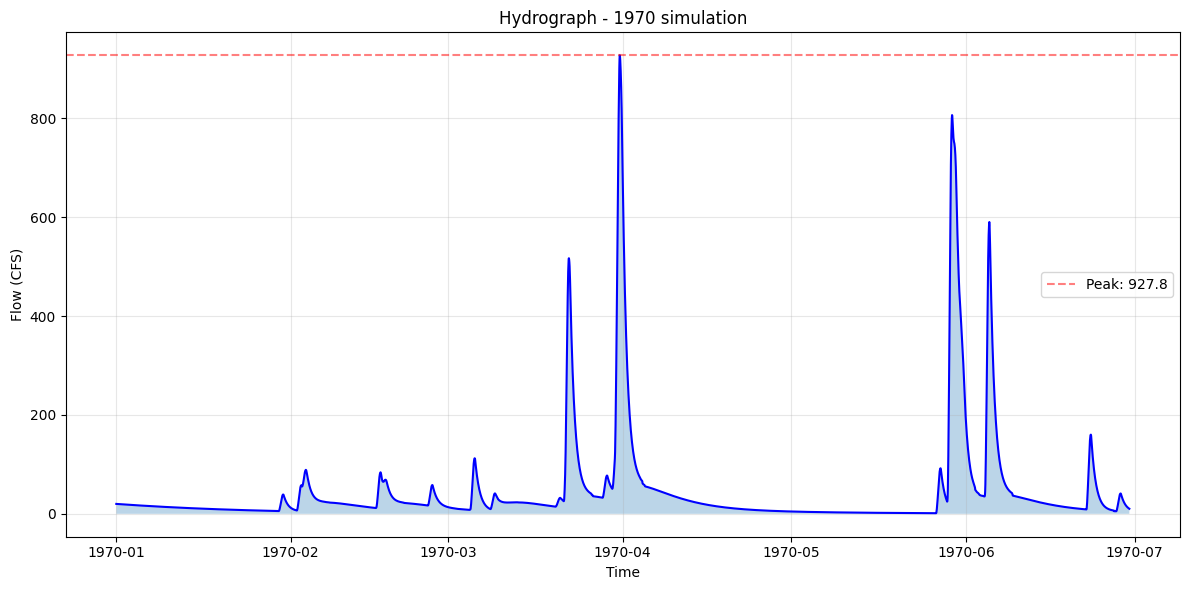

In [12]:
try:
    import matplotlib.pyplot as plt
    
    if 'flows' in dir() and flows is not None and not flows.empty:
        fig, ax = plt.subplots(figsize=(12, 6))
        
        ax.plot(flows.index, flows['value'], 'b-', linewidth=1.5)
        ax.fill_between(flows.index, flows['value'], alpha=0.3)
        
        ax.set_xlabel('Time')
        ax.set_ylabel(f"Flow ({flows.attrs.get('units', 'CFS')})")
        ax.set_title(f"Hydrograph - {run_name}")
        ax.grid(True, alpha=0.3)
        
        # Mark peak
        peak_idx = flows['value'].idxmax()
        peak_val = flows['value'].max()
        ax.axhline(y=peak_val, color='r', linestyle='--', alpha=0.5, label=f'Peak: {peak_val:.1f}')
        ax.legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print("No flow data available for plotting")
        
except ImportError:
    print("matplotlib not installed. Install with: pip install matplotlib")

## Troubleshooting

### Common Issues and Solutions

| Issue | Possible Cause | Solution |
|-------|---------------|----------|
| `HmsCmdr.compute_run()` returns False | HMS not installed or not found | Verify HMS 4.x is installed in standard location |
| `HmsCmdr.compute_run()` returns False | Java not available | Install Java 8+ JDK/JRE |
| "DSS operations not available" | pyjnius not installed | Run `pip install pyjnius` |
| "No peak flows found" | DSS file empty | Check HMS console output for execution errors |
| Execution hangs | Large project or slow disk | Wait longer (can take 2-5 min for large projects) |
| "Project not found" | Wrong path or extraction failed | Verify `project_path.exists()` is True |

### Checking HMS Installation

```python
from hms_commander import HmsExamples
versions = HmsExamples.list_versions()
print(f"Found {len(versions)} HMS installations: {versions}")
```

### Checking Java

```bash
java -version
```

If Java is not found, install JDK 8 or later from [Adoptium](https://adoptium.net/).

## Summary

This notebook demonstrated the core hms-commander workflow:

| Step | Function | Description |
|------|----------|-------------|
| 1 | `HmsExamples.extract_project()` | Get reproducible example project |
| 2 | `init_hms_project()` | Initialize project and build DataFrames |
| 3 | `hms.run_df` | Discover available simulation runs |
| 4 | `HmsCmdr.compute_run()` | Execute HMS simulation (returns bool) |
| 5 | `HmsResults.get_peak_flows()` | Extract peak flow summary |
| 6 | `HmsDss.read_timeseries()` | Extract full hydrograph |

## Next Steps

- **02_project_dataframes.ipynb**: Explore project structure via DataFrames
- **03_file_ops_basin_met_control_gage.ipynb**: Work with individual HMS files
- **04_run_management.ipynb**: Configure and validate simulation runs